In [184]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd
import math
import time
from matplotlib.dates import MonthLocator, WeekdayLocator, WEEKLY, DateFormatter,rrulewrapper, RRuleLocator
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
import matplotlib as mpl


pd.options.display.max_columns = 100

In [243]:
#df = pd.read_csv('crime_thru_midsept.csv')
df = pd.read_csv('Crime_Data.csv')
df = pd.DataFrame(df)
df.tail()

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
492278,20180000345906,09/16/2018,10.0,09/16/2018,10.0,DUI,DUI-LIQUOR,SOUTH,S,S3,RAINIER BEACH
492279,20180000345900,09/16/2018,5.0,09/16/2018,5.0,ROBBERY-COMMERCIAL,ROBBERY-BUSINESS-BODYFORCE,WEST,Q,Q3,QUEEN ANNE
492280,20180000346426,09/16/2018,1.0,09/16/2018,1406.0,MOTOR VEHICLE THEFT,VEH-THEFT-AUTO,SOUTHWEST,F,F2,SOUTH DELRIDGE
492281,20070000430946,NaN,NaN,01/01/2007,NaN,RAPE,RAPE-OTHER,UNKNOWN,NaN,NaN,UNKNOWN
492282,19990000333737,NaN,NaN,01/01/1999,NaN,THEFT-SHOPLIFT,THEFT-SHOPLIFT,UNKNOWN,NaN,NaN,UNKNOWN


In [393]:
#df = pd.read_csv('crime_thru_midsept.csv')
df = pd.read_csv('Crime_Data.csv')
#df = pd.read_csv('Aug_Sept.csv')
df = pd.DataFrame(df)
df['date'] = pd.to_datetime(df['Occurred Date'],infer_datetime_format=True)
mask1 = (df['date'] > '2007-12-31') & (df['date'] < '2018-12-31')
df = df.loc[mask1] 
df = df[['Crime Subcategory', 'date']]
dfg = df.groupby(['date']).count()
dfg['date']=dfg.index
dfw = dfg.resample('W').sum()
dfw=dfw[1:]
#dfw=dfw[:-1]
series = dfw['Crime Subcategory']
dfw.rename(columns={'Crime Subcategory': 'number_crimes'}, inplace=True)
dfw

,number_crimes
date,
2008-01-13,787
2008-01-20,743
2008-01-27,718
2008-02-03,657
2008-02-10,689
2008-02-17,755
2008-02-24,783
2008-03-02,786
2008-03-09,742


In [409]:
# Baseline:  Average Crimes/Week
train, test = series.values[0:-150], series.values[-150:]
pred_test_avg=test*0+train.mean()
pred_train_avg=train*0+train.mean()
rmse_test = sqrt(mean_squared_error(pred_test_avg, test))
rmse_train = sqrt(mean_squared_error(pred_train_avg, train))
print(rmse_test)
print(rmse_train)

135.60951991500107
84.64606159704596


In [410]:
pred_test_avg

array([849.34729064, 849.34729064, 849.34729064, 849.34729064,
       849.34729064, 849.34729064, 849.34729064, 849.34729064,
       849.34729064, 849.34729064, 849.34729064, 849.34729064,
       849.34729064, 849.34729064, 849.34729064, 849.34729064,
       849.34729064, 849.34729064, 849.34729064, 849.34729064,
       849.34729064, 849.34729064, 849.34729064, 849.34729064,
       849.34729064, 849.34729064, 849.34729064, 849.34729064,
       849.34729064, 849.34729064, 849.34729064, 849.34729064,
       849.34729064, 849.34729064, 849.34729064, 849.34729064,
       849.34729064, 849.34729064, 849.34729064, 849.34729064,
       849.34729064, 849.34729064, 849.34729064, 849.34729064,
       849.34729064, 849.34729064, 849.34729064, 849.34729064,
       849.34729064, 849.34729064, 849.34729064, 849.34729064,
       849.34729064, 849.34729064, 849.34729064, 849.34729064,
       849.34729064, 849.34729064, 849.34729064, 849.34729064,
       849.34729064, 849.34729064, 849.34729064, 849.34

In [412]:
# Baseline:  Naive Model.  Today's Crime = Yesterday's Crime
X = series.values
train, test = X[0:-150], X[-150:]
# walk-forward validation
history = [x for x in train]
predictions_naive = list()
for i in range(len(test)):
	# make prediction
	predictions_naive.append(history[-1])
	# observation
	history.append(test[i])
    
# report performance
rmse = sqrt(mean_squared_error(test, predictions_naive))

print('RMSE: %.3f' % rmse)

predictions_naive


RMSE: 91.538


[933,
 1000,
 1055,
 987,
 862,
 987,
 975,
 1015,
 976,
 1021,
 867,
 903,
 939,
 939,
 1074,
 1029,
 998,
 959,
 995,
 978,
 912,
 796,
 887,
 917,
 894,
 870,
 915,
 959,
 909,
 938,
 932,
 1017,
 1009,
 933,
 873,
 968,
 889,
 989,
 1049,
 900,
 907,
 896,
 879,
 883,
 895,
 948,
 939,
 849,
 925,
 932,
 917,
 904,
 949,
 985,
 950,
 947,
 1002,
 1030,
 997,
 992,
 941,
 981,
 926,
 898,
 936,
 922,
 958,
 999,
 861,
 844,
 898,
 915,
 949,
 884,
 978,
 1066,
 1053,
 916,
 926,
 902,
 975,
 943,
 876,
 1001,
 1031,
 917,
 909,
 912,
 963,
 1127,
 985,
 968,
 999,
 1038,
 1082,
 984,
 1017,
 1021,
 1082,
 907,
 1001,
 997,
 944,
 973,
 1008,
 1012,
 1009,
 885,
 875,
 980,
 966,
 1035,
 897,
 974,
 977,
 858,
 1003,
 952,
 920,
 907,
 1000,
 945,
 1020,
 918,
 943,
 869,
 948,
 940,
 1005,
 961,
 941,
 895,
 1012,
 1018,
 991,
 998,
 1073,
 926,
 1009,
 1024,
 1017,
 1007,
 969,
 940,
 1063,
 988,
 1034,
 929,
 886,
 887]

In [413]:
history = [x for x in train]
predictions_naive_train = list()
for i in range(len(train)):
	# make prediction
	predictions_naive_train.append(history[-1])
	# observation
	history.append(train[i])
    
rmse = sqrt(mean_squared_error(train, predictions_naive_train))    
print('RMSE: %.3f' % rmse)


RMSE: 65.660


In [414]:
len(predictions_naive_train)

406

## OLS

In [399]:
dfw['y']=dfw['number_crimes']
dfw['ds']=dfw.index
weekly = dfw[['ds','y']]

dfplus = pd.read_csv('dfplus.csv')
dfplus.index = dfplus['date']

weekly
weekpt = weekly.join(dfplus['temp'])
weekpt = weekpt.join(dfplus['prec'])
weekpt_train = weekpt[:-150]
dfols = weekpt.reset_index()
dfols['startdate'] = dfols.index

y = dfols['y']
X2 = dfols[['startdate']]
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=150, random_state=42)
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

In [400]:
model2 = LinearRegression()
model2.fit(X2_train, y_train)
y2_pred = model2.predict(X2_test)
y2_pred_train = model2.predict(X2_train)
print (model2.score(X2_test, y_test))
print (model2.score(X2_train, y_train))
print(sqrt(mean_squared_error(y_test, y2_pred)))

0.1007906018990039
0.374945034308223
103.6210622475676


In [401]:
est2 = LinearRegression()
degree = 5
p2 = PolynomialFeatures(degree)
a2 = p2.fit_transform(X2_train)
s2 = StandardScaler()
s2.fit(a2)
X2t_train = s2.transform(a2)
est2.fit(X2t_train, y_train)

b2 = p2.fit_transform(X2_test)
X2t_test= s2.transform(b2)
predictions_test_ols = est2.predict(X2t_test)
predictions_train_ols = est2.predict(X2t_train)

print(est2.coef_)
print()
print ('RMSE:')
print(sqrt(mean_squared_error(y_test, predictions_test_ols)))

[   0.          177.99301442   34.08398655 -302.53890855  -20.63997859
  189.9419544 ]

RMSE:
96.94931706294294


## LSTM

In [397]:
# frame a sequence as a stacked supervised learning problem:  1 lag, not 3, 150 epochs
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = np.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:1], train[:, -1]
    X = X.reshape(X.shape[0], X.shape[1], 1)
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), 
                   stateful=True, return_sequences=True))
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1,1,len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

#load the dataset
dataset = series.values
dataset = dataset.astype('float32')

# transform data to be supervised learning
supervised = timeseries_to_supervised(dataset,1)
supervised_values = supervised.values

# split into train and test sets
train, test = supervised_values[0:-150], supervised_values[-150:]

# normalize the dataset
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 150, 1)

# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

#walk-forward validation on the test data
predictions_test_lstm = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# store forecast
	predictions_test_lstm.append(yhat)
	expected = series.values[len(train) + i]
	print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

predictions_train_lstm = list()
for i in range(len(train_scaled)):
	# make one-step forecast
	X_train, y_train = train_scaled[i, 0:-1], train_scaled[i, -1]
	yhat_train = forecast_lstm(lstm_model, 1, X_train)
	# invert scaling
	yhat_train = invert_scale(scaler, X, yhat_train)
	# store forecast
	predictions_train_lstm.append(yhat_train)
	expected = series.values[i]

# report performance
trainScore = sqrt(mean_squared_error(series.values[:-150], predictions_train_lstm))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = sqrt(mean_squared_error(series.values[-150:], predictions_test_lstm))
print('Test Score: %.3f RMSE' % (testScore))




Epoch 1/1
406/406 [==============================] - 4s 11ms/step - loss: 0.0897
Epoch 1/1
406/406 [==============================] - 2s 4ms/step - loss: 0.0866
Epoch 1/1
406/406 [==============================] - 2s 4ms/step - loss: 0.0787
Epoch 1/1
406/406 [==============================] - 1s 4ms/step - loss: 0.0702
Epoch 1/1
406/406 [==============================] - 1s 4ms/step - loss: 0.0654
Epoch 1/1
406/406 [==============================] - 2s 4ms/step - loss: 0.0643
Epoch 1/1
406/406 [==============================] - 2s 4ms/step - loss: 0.0638
Epoch 1/1
406/406 [==============================] - 2s 4ms/step - loss: 0.0634
Epoch 1/1
406/406 [==============================] - 1s 4ms/step - loss: 0.0629
Epoch 1/1
406/406 [==============================] - 1s 4ms/step - loss: 0.0623
Epoch 1/1
406/406 [==============================] - 1s 4ms/step - loss: 0.0617
Epoch 1/1
406/406 [==============================] - 1s 4ms/step - loss: 0.0611
Epoch 1/1
406/406 [====================

406/406 [==============================] - 1s 4ms/step - loss: 0.0465
Epoch 1/1
406/406 [==============================] - 1s 4ms/step - loss: 0.0465
Epoch 1/1
406/406 [==============================] - 1s 4ms/step - loss: 0.0465
Epoch 1/1
406/406 [==============================] - 2s 4ms/step - loss: 0.0465
Epoch 1/1
406/406 [==============================] - 2s 4ms/step - loss: 0.0465
Epoch 1/1
406/406 [==============================] - 2s 4ms/step - loss: 0.0464
Epoch 1/1
406/406 [==============================] - 2s 4ms/step - loss: 0.0464
Epoch 1/1
406/406 [==============================] - 1s 4ms/step - loss: 0.0464
Epoch 1/1
406/406 [==============================] - 1s 4ms/step - loss: 0.0464
Epoch 1/1
406/406 [==============================] - 1s 4ms/step - loss: 0.0464
Epoch 1/1
406/406 [==============================] - 1s 4ms/step - loss: 0.0464
Epoch 1/1
406/406 [==============================] - 1s 4ms/step - loss: 0.0464
Epoch 1/1
406/406 [==============================]

Day=118, Predicted=948.311218, Expected=920.000000
Day=119, Predicted=935.808594, Expected=907.000000
Day=120, Predicted=922.866272, Expected=1000.000000
Day=121, Predicted=950.962524, Expected=945.000000
Day=122, Predicted=947.887695, Expected=1020.000000
Day=123, Predicted=967.159912, Expected=918.000000
Day=124, Predicted=946.958862, Expected=943.000000
Day=125, Predicted=943.598511, Expected=869.000000
Day=126, Predicted=908.399475, Expected=948.000000
Day=127, Predicted=927.537903, Expected=940.000000
Day=128, Predicted=933.833008, Expected=1005.000000
Day=129, Predicted=957.315369, Expected=961.000000
Day=130, Predicted=956.626709, Expected=941.000000
Day=131, Predicted=948.876038, Expected=895.000000
Day=132, Predicted=924.647705, Expected=1012.000000
Day=133, Predicted=954.653809, Expected=1018.000000
Day=134, Predicted=970.575745, Expected=991.000000
Day=135, Predicted=972.121155, Expected=998.000000
Day=136, Predicted=974.425476, Expected=1073.000000
Day=137, Predicted=985.24

In [320]:
for i in range(len(dataset)):
	# make one-step forecast
	X, y = dataset[i, 0:-1], dataset[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	#yhat = invert_scale(scaler, X, yhat)
	# store forecast
	predictions_test_lstm.append(yhat)
	expected = series.values[len(train) + i]
	print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


#Sept 2

IndexError: too many indices for array

In [321]:
#k = (dfw[-5:]).values
#s = (k).reshape(1,1,len(k))
#yhat = lstm_model.predict(s)
#Sept 9
#912
#series = dfw['Crime Subcategory']
#s = 912
#k
dataset

array([ 787.,  743.,  718.,  657.,  689.,  755.,  783.,  786.,  742.,
        735.,  738.,  813.,  753.,  730.,  769.,  836.,  756.,  838.,
        789.,  846.,  838.,  805.,  903.,  843.,  824.,  810.,  762.,
        893.,  910.,  821.,  827.,  801.,  797.,  861.,  847.,  877.,
        950.,  926.,  900.,  856.,  874.,  974.,  960.,  886.,  849.,
        893.,  834.,  861.,  823.,  659.,  610.,  854.,  897.,  881.,
        853.,  916.,  838.,  752.,  767.,  717.,  763.,  823.,  766.,
        819.,  752.,  885.,  797.,  777.,  769.,  737.,  850.,  869.,
        858.,  784.,  842.,  885.,  881.,  798.,  819.,  871.,  931.,
        877.,  898.,  883.,  967.,  925.,  891.,  989.,  999.,  959.,
        940.,  893.,  933.,  977.,  883.,  809.,  899.,  984.,  872.,
        832.,  841., 1005.,  875.,  923.,  982.,  967.,  997.,  987.,
        877.,  836.,  782.,  800.,  752.,  782.,  848.,  837.,  791.,
        746.,  842.,  888.,  839.,  819.,  863.,  854.,  938.,  866.,
        804.,  873.,

In [383]:
# frame a sequence as a stacked supervised learning problem:  1 lag, not 3, 150 epochs
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# scale train and test data to [-1, 1]
def scale( test):
	# fit scaler
	#scaler = MinMaxScaler(feature_range=(-1, 1))
	#scaler = scaler.fit(train)
	# transform train
	#train = train.reshape(train.shape[0], train.shape[1])
	#train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler,  test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

# fit an LSTM network to training data
#def fit_lstm(train, batch_size, nb_epoch, neurons):
#     X, y = train[:, 0:1], train[:, -1]
#     X = X.reshape(X.shape[0], X.shape[1], 1)
#     model = Sequential()
#     model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), 
#                    stateful=True, return_sequences=True))
#     model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
#     model.add(Dense(1))
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     for i in range(nb_epoch):
#         model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
#         model.reset_states()
#     return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1,1,len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

#load the dataset
dataset = dfw.values
dataset = dataset.astype('float32')

# transform data to be supervised learning
supervised = timeseries_to_supervised(dataset,1)
supervised_values = supervised.values

# split into train and test sets
test = supervised_values

# normalize the dataset
scaler,test_scaled = scale(test)
# fit the model
#lstm_model = fit_lstm(train_scaled, 1, 150, 1)

# # forecast the entire training dataset to build up state for forecasting
# train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
# lstm_model.predict(train_reshaped, batch_size=1)

#walk-forward validation on the test data
predictions_test_lstm = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # store forecast
    predictions_test_lstm.append(yhat)
    #expected = series.values[len(test) + i]
    expected = series.values[i]
    print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

# report performance
testScore = sqrt(mean_squared_error(series.values, predictions_test_lstm))
print('Test Score: %.3f RMSE' % (testScore))


Day=1, Predicted=787.199524, Expected=787.000000
Day=2, Predicted=776.394531, Expected=743.000000
Day=3, Predicted=774.195007, Expected=718.000000
Day=4, Predicted=771.372620, Expected=657.000000
Day=5, Predicted=763.571777, Expected=689.000000
Day=6, Predicted=762.083984, Expected=755.000000
Day=7, Predicted=766.964478, Expected=783.000000
Day=8, Predicted=774.882324, Expected=786.000000
Day=9, Predicted=783.447510, Expected=742.000000
Day=10, Predicted=782.425049, Expected=735.000000
Day=11, Predicted=779.785034, Expected=738.000000
Day=12, Predicted=778.214905, Expected=813.000000
Day=13, Predicted=790.609802, Expected=753.000000
Day=14, Predicted=789.042053, Expected=730.000000
Day=15, Predicted=782.955627, Expected=769.000000
Day=16, Predicted=785.516296, Expected=836.000000
Day=17, Predicted=803.062500, Expected=756.000000
Day=18, Predicted=797.932861, Expected=838.000000
Day=19, Predicted=814.349487, Expected=789.000000
Day=20, Predicted=812.893921, Expected=846.000000
Day=21, P

Day=221, Predicted=791.502319, Expected=791.000000
Day=222, Predicted=796.663574, Expected=743.000000
Day=223, Predicted=790.001343, Expected=819.000000
Day=224, Predicted=802.129028, Expected=801.000000
Day=225, Predicted=807.985596, Expected=896.000000
Day=226, Predicted=843.296448, Expected=780.000000
Day=227, Predicted=828.147705, Expected=746.000000
Day=228, Predicted=806.405334, Expected=858.000000
Day=229, Predicted=825.501282, Expected=843.000000
Day=230, Predicted=837.492554, Expected=815.000000
Day=231, Predicted=834.515930, Expected=712.000000
Day=232, Predicted=801.341980, Expected=767.000000
Day=233, Predicted=795.961426, Expected=845.000000
Day=234, Predicted=813.570679, Expected=855.000000
Day=235, Predicted=833.924866, Expected=749.000000
Day=236, Predicted=812.444397, Expected=805.000000
Day=237, Predicted=813.617432, Expected=823.000000
Day=238, Predicted=820.953064, Expected=808.000000
Day=239, Predicted=821.783875, Expected=768.000000
Day=240, Predicted=809.804260, 

Day=445, Predicted=970.650391, Expected=900.000000
Day=446, Predicted=946.918518, Expected=907.000000
Day=447, Predicted=925.921997, Expected=896.000000
Day=448, Predicted=911.398193, Expected=879.000000
Day=449, Predicted=897.135620, Expected=883.000000
Day=450, Predicted=891.443726, Expected=895.000000
Day=451, Predicted=894.415649, Expected=948.000000
Day=452, Predicted=919.151733, Expected=939.000000
Day=453, Predicted=930.788940, Expected=849.000000
Day=454, Predicted=897.476135, Expected=925.000000
Day=455, Predicted=907.743225, Expected=932.000000
Day=456, Predicted=920.306213, Expected=917.000000
Day=457, Predicted=921.020142, Expected=904.000000
Day=458, Predicted=914.543945, Expected=949.000000
Day=459, Predicted=929.125061, Expected=985.000000
Day=460, Predicted=952.236816, Expected=950.000000
Day=461, Predicted=953.397705, Expected=947.000000
Day=462, Predicted=949.716187, Expected=1002.000000
Day=463, Predicted=966.358215, Expected=1030.000000
Day=464, Predicted=977.585266

In [366]:
y

0.37196255

In [178]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [179]:
mean_absolute_percentage_error(y_true, predictions_test_lstm)

4.846732261628979

In [180]:
mean_absolute_percentage_error(y_true,predictions_naive)

6.9236265072218295

In [267]:
mean_absolute_percentage_error(y_true,predictions_test_ols)

10.15608595523399

## Multivariate LSTM

In [11]:
weather2 = pd.read_csv('1452977.csv')
weather1 = pd.read_csv('1465173.csv')
weather = pd.concat([weather1,weather2])
weather['date'] = pd.to_datetime(weather['DATE'],infer_datetime_format=True)
mask1 = (weather['date'] >'2008-01-07') & (weather['date'] <'2018-08-26')
w = weather.loc[mask1] 
w = w[['date', 'HOURLYPrecip', 'HOURLYDRYBULBTEMPF']]
w['date'] = pd.to_datetime(w['date'].dt.date)

#Replacing values with "s" in them with NA
#Replacing "Trace" precipitation with 0
replacements = {
   'HOURLYDRYBULBTEMPF': {
      r'(.*s)': np.NaN,
      r'(\*)': np.NaN}
}
w.replace(replacements, regex=True, inplace=True)

replacements = {
   'HOURLYPrecip': {
      r'(.*s)': np.NaN,
    r'T': 0.00}
}
w.replace(replacements, regex=True, inplace=True)
w['temp'] = [float(x) for x in w['HOURLYDRYBULBTEMPF']]
w['prec'] = [float(x) for x in w['HOURLYPrecip']]
# wgroup = w.groupby('dateonly')['prec'].mean()
# wgroup = w.groupby('dateonly')['temp'].mean()
wgroup = w.groupby('date')['prec','temp'].mean()
wgroup['date']=wgroup.index
wgroupw = wgroup.resample('W').mean()
dfplus = dfw.join(wgroupw)
dfplus.interpolate(inplace=True)

dfplus.info()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10,11,12,13,14,15,16,17,19,20,23,25,26,27,28,29,33,34,44,45,46,47,72,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (26,27,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 555 entries, 2008-01-13 to 2018-08-26
Freq: W-SUN
Data columns (total 5 columns):
number_crimes    555 non-null int64
y                555 non-null int64
ds               555 non-null datetime64[ns]
prec             555 non-null float64
temp             555 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 26.0 KB


In [12]:
dfp = dfplus[['y','temp', 'prec']]
dfp

,y,temp,prec
date,,,
2008-01-13,787,42.161250,0.008951
2008-01-20,743,37.983367,0.002260
2008-01-27,718,33.490916,0.001154
2008-02-03,657,38.048619,0.003296
2008-02-10,689,43.034533,0.006571
2008-02-17,755,43.063881,0.000179
2008-02-24,783,44.080252,0.000000
2008-03-02,786,47.138508,0.001662
2008-03-09,742,44.696328,0.000563


In [13]:
# Multi - value
# frame a sequence as a supervised learning problemc
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
# scale train and test data to [-1, 1]

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = np.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:3], train[:, 3]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

#load data
dataset = dfp.values
dataset = dataset.astype('float32')

# transform data to be supervised learning
supervised = timeseries_to_supervised(dataset, 1)
supervised = supervised.iloc[:,0:4]
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-150], supervised_values[-150:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 100, 1)

# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0:3].reshape(len(train_scaled), 1, 3)
lstm_model.predict(train_reshaped, batch_size=1)           
       
#walk-forward validation on the test data
predictions_test_mv = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:3], test_scaled[i, 3]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# store forecast
	predictions_test_mv.append(yhat)
	expected = series.values[len(train) + i]
	print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

predictions_train_mv = list()
for i in range(len(train_scaled)):
	# make one-step forecast
	X_train, y_train = train_scaled[i, 0:3], train_scaled[i, 3]
	yhat_train = forecast_lstm(lstm_model, 1, X_train)
	# invert scaling
	yhat_train = invert_scale(scaler, X_train, yhat_train)
    
	# store forecast
	predictions_train_mv.append(yhat_train)
	expected = series.values[i]

# report performance
trainScore = sqrt(mean_squared_error(series.values[:-150], predictions_train_mv))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = sqrt(mean_squared_error(series.values[-150:], predictions_test_mv))
print('Test Score: %.3f RMSE' % (testScore))


Epoch 1/1
405/405 [==============================] - 2s 4ms/step - loss: 0.1129
Epoch 1/1
405/405 [==============================] - 1s 2ms/step - loss: 0.0995
Epoch 1/1
405/405 [==============================] - 1s 3ms/step - loss: 0.1001
Epoch 1/1
405/405 [==============================] - 1s 3ms/step - loss: 0.0997
Epoch 1/1
405/405 [==============================] - 1s 3ms/step - loss: 0.0988
Epoch 1/1
405/405 [==============================] - 1s 3ms/step - loss: 0.0975
Epoch 1/1
405/405 [==============================] - 1s 3ms/step - loss: 0.0959
Epoch 1/1
405/405 [==============================] - 1s 3ms/step - loss: 0.0940
Epoch 1/1
405/405 [==============================] - 1s 3ms/step - loss: 0.0920
Epoch 1/1
405/405 [==============================] - 1s 3ms/step - loss: 0.0897A: 0s - loss: 0.0
Epoch 1/1
405/405 [==============================] - 1s 3ms/step - loss: 0.0874
Epoch 1/1
405/405 [==============================] - 1s 3ms/step - loss: 0.0849A: 0s - loss - ETA: 0s -

Train Score: 61.496 RMSE
Test Score: 60.018 RMSE


In [14]:
supervised

,0,1,2,0
0,0.0,0.000000,0.000000,787.0
1,787.0,42.161251,0.008951,743.0
2,743.0,37.983368,0.002260,718.0
3,718.0,33.490917,0.001154,657.0
4,657.0,38.048618,0.003296,689.0
5,689.0,43.034534,0.006571,755.0
6,755.0,43.063881,0.000179,783.0
7,783.0,44.080254,0.000000,786.0
8,786.0,47.138508,0.001662,742.0
9,742.0,44.696327,0.000563,735.0


## Multi-method plot

<Figure size 432x288 with 0 Axes>

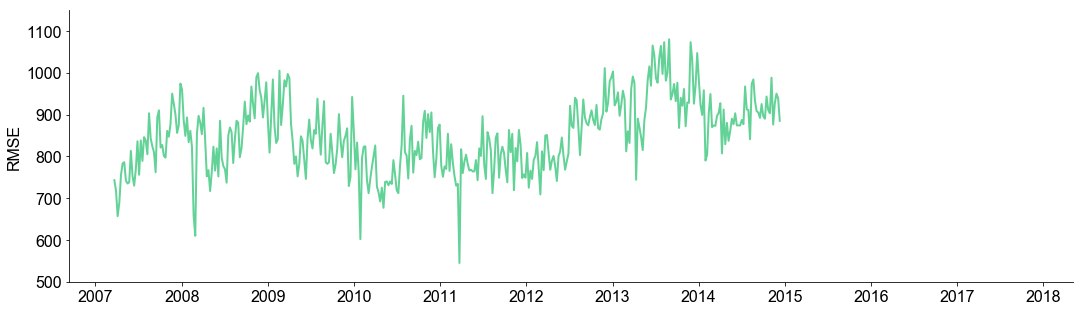

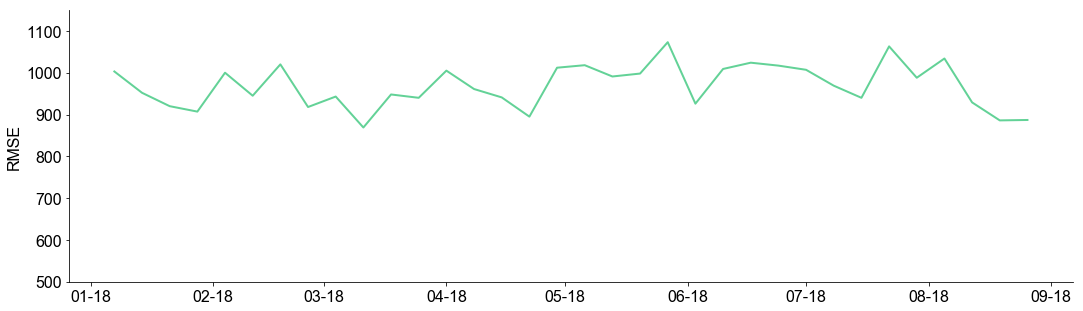

In [60]:
# AVERAGE
# test
# train
pred_test_avg
pred_train_avg

# NAIVE
# test
# train
predictions_naive
predictions_naive_train

# OLS
# test
# train


# LSTM
# test
# train
predictions_test_lstm
predictions_train_lstm

# LSTM with variables
# test
# train
# predictions_test_mv
# predictions_train_mv

# line plot of observed vs predicted
plt.clf()
months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
monthsFmt = DateFormatter("%Y")

fig, ax = plt.subplots(figsize=(18,5))
ax = plt.subplot(111)
ax.plot_date(dfw.index[-150:],series.values[-150:], '-', color = 'white')
#ax.plot_date(dfw.index[-150:],predictions, '-')
#ax.plot_date(dfw.index[3:-150],train[3:], '-',)
ax.plot_date(dfw.index[1:-150],series.values[1:-150], '-', color = '#63d297', linewidth = 2.0)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.xticks( **{'fontname':'Arial'})
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })
plt.ylim(500, 1150)

plt.show()

# #2018 Only

months    = MonthLocator(range(1,13), bymonthday=1, interval=1)
monthsFmt = DateFormatter("%m-%y")


fig, ax = plt.subplots(figsize=(18,5))
ax.plot_date(dfw.index[-34:],series.values[-34:], '-', linewidth = 2.0, color = '#63d297')
#ax.plot_date(dfw.index[-34:],predictions[-34:], '-', linewidth = 2.0)
#ax.plot_date(dfw.index[-34:],predictionsn[-34:], '-', color = 'grey', linewidth = 0.4)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks( **{'fontname':'Arial'})
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })
plt.ylim(500, 1150)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

plt.savefig('avg1b.jpg', bbox_inches = 'tight',format = 'jpeg', dpi=600)
plt.show()

<Figure size 432x288 with 0 Axes>

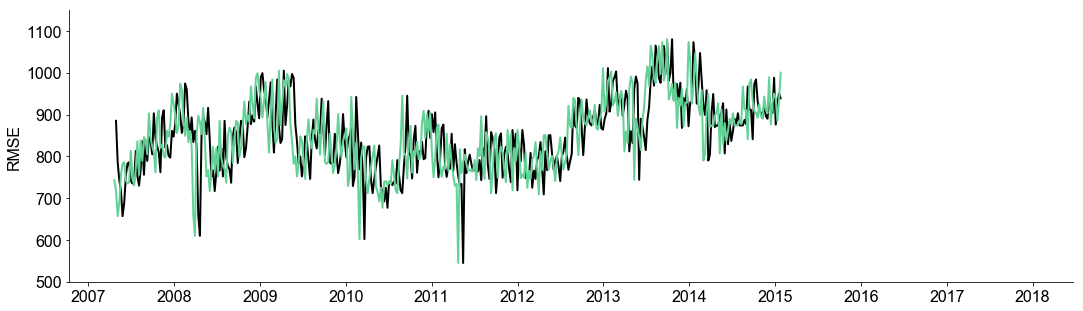

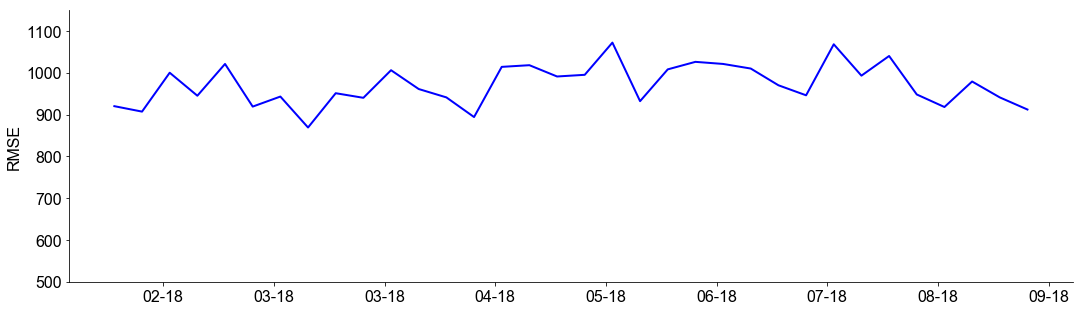

In [251]:
# AVERAGE
# test
# train
pred_test_avg
pred_train_avg

# NAIVE
# test
# train
predictions_naive
#predictions_

# OLS
# test
# train
predictions_test_mv
predictions_train_mv

# LSTM
# test
# train
predictions_test_lstm
predictions_train_lstm

# LSTM with variables
# test
# train
# predictions_test_mv
# predictions_train_mv

# line plot of observed vs predicted
plt.clf()

months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
monthsFmt = DateFormatter("%Y")

fig, ax = plt.subplots(figsize=(18,5))
ax = plt.subplot(111)
ax.plot_date(dfw.index[-150:],series.values[-150:], '-' , color = 'white')
#ax.plot_date(dfw.index[-150:],predictions, '-')
ax.plot_date(dfw.index[2:-150],predictions_naive_train, '-',color = 'black', linewidth = 2.0)
ax.plot_date(dfw.index[1:-150],series.values[1:-150], '-',color= '#63d297', linewidth = 2.0)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks( **{'fontname':'Arial'})
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })
plt.ylim(500, 1150)
#plt.show()

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

#2018 Only
rule = rrulewrapper(WEEKLY, interval=4)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m-%y')

fig, ax = plt.subplots(figsize=(18,5))
ax.plot_date(dfw.index[-34:],series.values[-34:], '-', linewidth = 2.0, color = 'blue')
#ax.plot_date(dfw.index[-34:],predictions[-34:], '-', linewidth = 2.0)
#ax.plot_date(dfw.index[-34:],predictions_naive[-34:], '-', color = 'black', linewidth = 0.3)
#ax.plot_date(dfw.index[-34:],series.values[-34:], '-', linewidth = 1.0, color = 'darkgrey')
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
plt.xticks( **{'fontname':'Arial'})
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylim(500, 1150)
plt.show();


<Figure size 432x288 with 0 Axes>

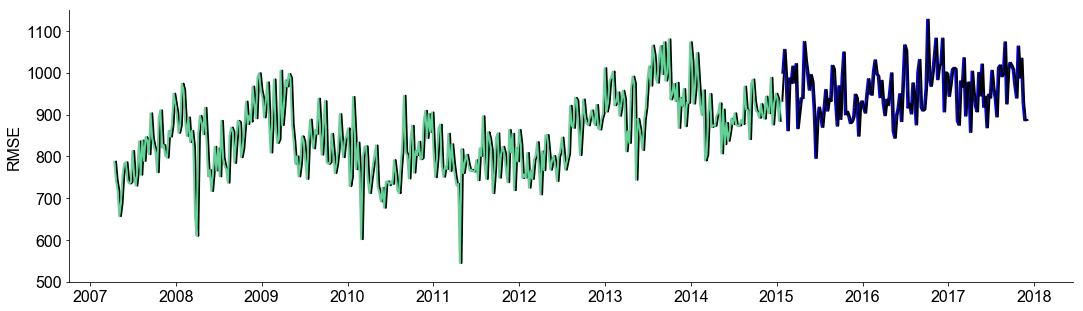

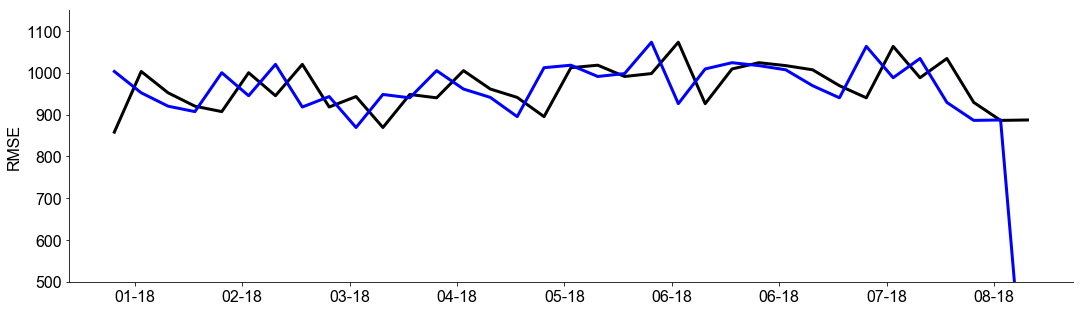

In [417]:
# line plot of observed vs predicted
plt.clf()
months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
monthsFmt = DateFormatter("%Y")

fig, ax = plt.subplots(figsize=(18,5))
ax.plot_date(dfw.index[-150:-1],series.values[-150:-1], '-' , color = 'blue', linewidth = 2.0)
#ax.plot_date(dfw.index[-150:],pred_test_avg, '-', color= 'black', linewidth =2.0)
#ax.plot_date(dfw.index[1:-150],pred_train_avg[1:], '-', color = 'black', linewidth = 2.0)
ax.plot_date(dfw.index[-150:],predictions_naive, '-', color= 'black', linewidth =2.0)
ax.plot_date(dfw.index[1:-150],predictions_naive_train[1:], '-', color = 'black', linewidth = 2.0)
ax.plot_date(dfw.index[:-150],series.values[:-150], '-',color= '#63d297', linewidth =2.0)

plt.ylim(500, 1150)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks( **{'fontname':'Arial'})
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })
plt.ylim(500, 1150)


plt.show()

#2018 Only

months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
formatter = DateFormatter('%m-%y')

fig, ax = plt.subplots(figsize=(18,5))
#ax.plot_date(dfw.index[-34:],series.values[-34:], '-', linewidth = 1.0)
ax.plot_date(dfw.index[-35:],predictions_naive[-35:], '-', linewidth = 3.0, color ='black')
#ax.plot_date(dfw.index[-34:],predictionsn[-34:], '-', color = 'grey', linewidth = 0.4)
ax.plot_date(dfw.index[-35:],series.values[-35:], '-', linewidth = 3.0, color = 'b')
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
plt.ylim(500, 1150)


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })

plt.xticks( **{'fontname':'Arial'})
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })
plt.show()


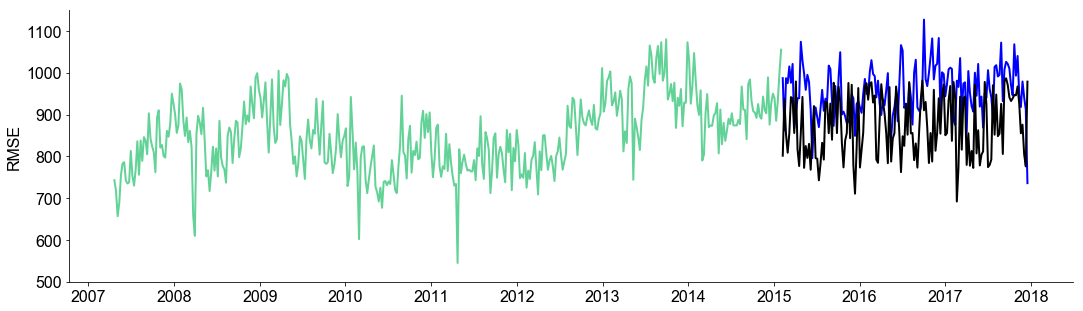

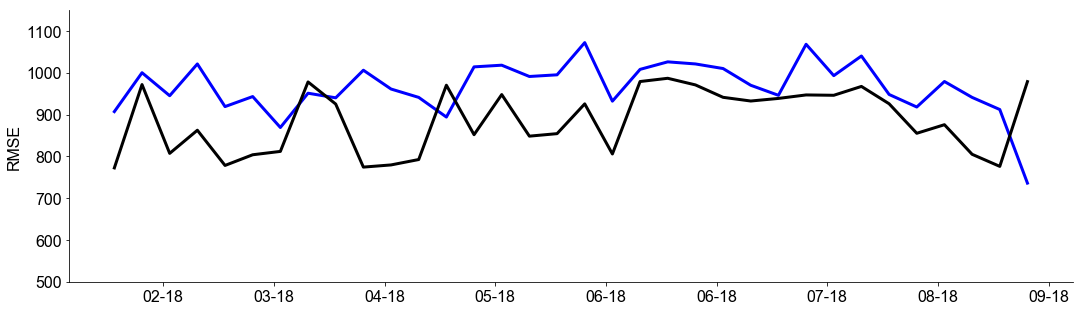

In [390]:

months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
monthsFmt = DateFormatter("%Y")

fig, ax = plt.subplots(figsize=(18,5))
ax.plot_date(dfw.index[-150:],series.values[-150:], '-', color = 'blue', linewidth = 2.0)
#ax.plot_date(dfw.index[-150:],pred_test_avg, '-', color= 'lightgrey', linewidth =1.0)
#ax.plot_date(dfw.index[:-150],pred_train_avg, '-', color = 'lightgrey', linewidth = 1.0)
ax.plot_date(dfw.index[1:-150],series.values[1:-150], '-', color = '#63d297', linewidth = 2.0)
ax.plot_date(dfw.index[-150:], predictions_test_ols, '-', color = 'black', linewidth = 2.0)
#ax.plot_date(dfw.index[1:-150], predictions_naive_train[1:], '-', color = 'black', linewidth = 2.0)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks( **{'fontname':'Arial'})
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })
plt.ylim(500, 1150)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.savefig('avg1g.jpg', bbox_inches = 'tight',format = 'jpeg', dpi=600)
plt.show()

#2018 Only
months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
formatter = DateFormatter('%m-%y')

fig, ax = plt.subplots(figsize=(18,5))
ax.plot_date(dfw.index[-34:],series.values[-34:], '-', color = 'blue', linewidth = 3.0)
#ax.plot_date(dfw.index[-34:],pred_test_avg[-34:], '-', color= 'black', linewidth =1.0)
# ax.plot_date(dfw.index[:-150],pred_train_avg[-34:], '-', color = 'lightgrey', linewidth = 1.0)
# ax.plot_date(dfw.index[:-150],series.values[:-34], '-', color = '#63d297', linewidth = 2.0)
#ax.plot_date(dfw.index[-34:], predictions_naive[-34:], '-', color = 'black', linewidth = 3.0)
ax.plot_date(dfw.index[-34:], predictions_test_ols[-34:], '-', color = 'black', linewidth = 3.0)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
plt.xticks( **{'fontname':'Arial'})

plt.ylim(500, 1150)
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('avg1h.jpg', bbox_inches = 'tight',format = 'jpeg', dpi=600)
plt.show()


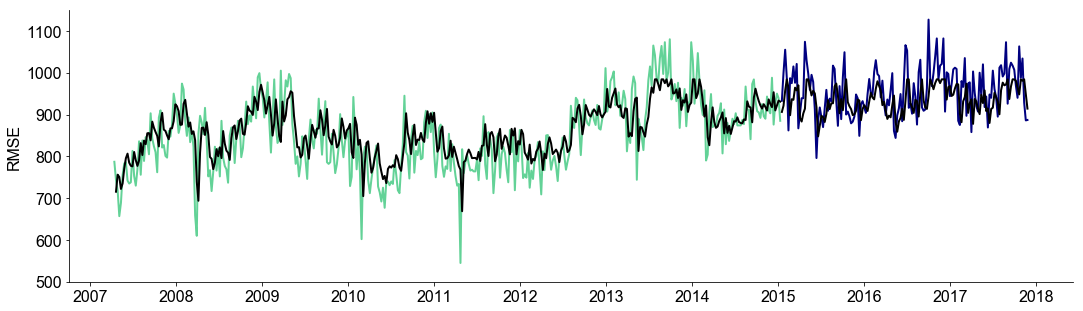

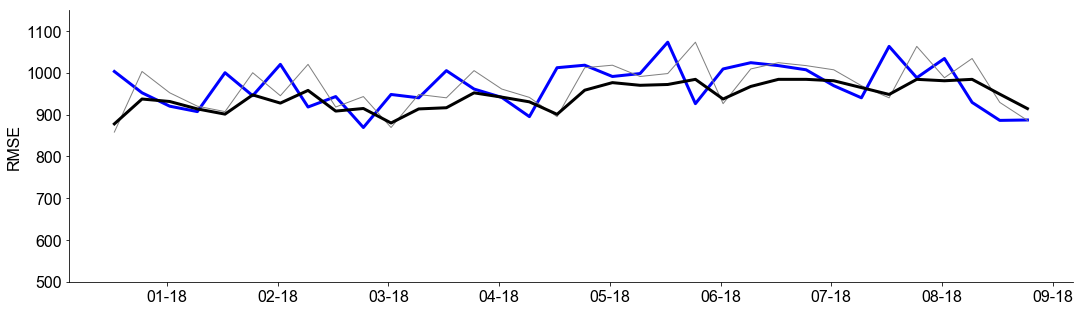

In [238]:

months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
monthsFmt = DateFormatter("%Y")

fig, ax = plt.subplots(figsize=(18,5))
ax.plot_date(dfw.index[-150:],series.values[-150:], '-', color = 'navy', linewidth = 2.0)
# ax.plot_date(dfw.index[-150:],pred_test_avg, '-', color= 'lightgrey', linewidth =1.0)
# ax.plot_date(dfw.index[:-150],pred_train_avg, '-', color = 'lightgrey', linewidth = 1.0)
ax.plot_date(dfw.index[:-150],series.values[:-150], '-', color = '#63d297', linewidth = 2.0)
#ax.plot_date(dfw.index[-150:], predictions_naive, '-', color = 'lightgrey', linewidth = 1.0)
#ax.plot_date(dfw.index[1:-150], predictions_naive_train[1:], '-', color = 'lightgrey', linewidth = 1.0)
ax.plot_date(dfw.index[-150:], predictions_test_mv, '-', color = 'black', linewidth = 2.0)
ax.plot_date(dfw.index[1:-150], predictions_train_mv[1:], '-', color = 'black', linewidth = 2.0)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks( **{'fontname':'Arial'})
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })
plt.ylim(500, 1150)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.savefig('avg1g.jpg', bbox_inches = 'tight',format = 'jpeg', dpi=600)
plt.show()

#2018 Only
months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
formatter = DateFormatter('%m-%y')

fig, ax = plt.subplots(figsize=(18,5))
ax.plot_date(dfw.index[-34:],series.values[-34:], '-', color = 'blue', linewidth = 3.0)
#ax.plot_date(dfw.index[-34:],pred_test_avg[-34:], '-', color= 'grey', linewidth =1.0)
# ax.plot_date(dfw.index[:-150],pred_train_avg[-34:], '-', color = 'lightgrey', linewidth = 1.0)
# ax.plot_date(dfw.index[:-150],series.values[:-34], '-', color = '#63d297', linewidth = 2.0)
ax.plot_date(dfw.index[-34:], predictions_naive[-34:], '-', color = 'grey', linewidth = 1.0)
ax.plot_date(dfw.index[-34:], predictions_test_mv[-34:], '-', color = 'black', linewidth = 3.0)
#ax.plot_date(dfw.index[-34:], predictions_naive_train[-34:], '-', color = 'grey', linewidth = 1.0)
#ax.plot_date(dfw.index[:-34], predictions_test_mv, '-', color = 'black', linewidth = 2.0)
#ax.plot_date(dfw.index[-34:], predictions_train_mv[-34:], '-', color = 'gray', linewidth = 3.0)
# Only show ticks on the left and bottom spines

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
plt.xticks( **{'fontname':'Arial'})

plt.ylim(500, 1150)
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('avg1h.jpg', bbox_inches = 'tight',format = 'jpeg', dpi=600)
plt.show()


In [86]:
len(predictions_naive)

0

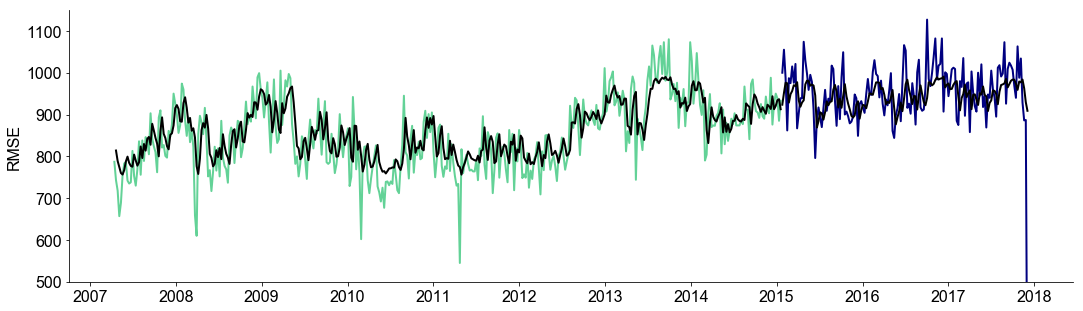

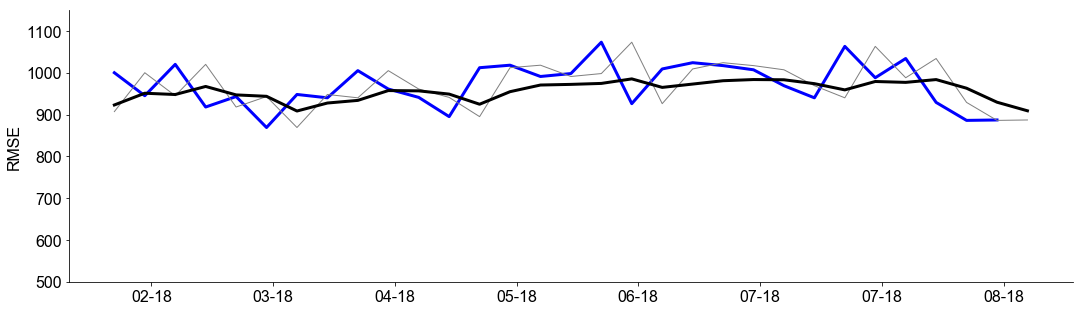

In [426]:
months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
monthsFmt = DateFormatter("%Y")

fig, ax = plt.subplots(figsize=(18,5))
ax.plot_date(dfw.index[-150:],series.values[-150:], '-', color = 'navy', linewidth = 2.0)
# ax.plot_date(dfw.index[-150:],pred_test_avg, '-', color= 'lightgrey', linewidth =1.0)
# ax.plot_date(dfw.index[:-150],pred_train_avg, '-', color = 'lightgrey', linewidth = 1.0)
ax.plot_date(dfw.index[:-150],series.values[:-150], '-', color = '#63d297', linewidth = 2.0)
# ax.plot_date(dfw.index[-150:], predictions_naive, '-', color = 'lightgrey', linewidth = 1.0)
# ax.plot_date(dfw.index[1:-150], predictions_naive_train[1:], '-', color = 'lightgrey', linewidth = 1.0)
# ax.plot_date(dfw.index[-150:], predictions_test_mv, '-', color = 'lightgrey', linewidth = 1.0)
# ax.plot_date(dfw.index[1:-150], predictions_train_mv[1:], '-', color = 'lightgrey', linewidth = 1.0)
ax.plot_date(dfw.index[-150:], predictions_test_lstm, '-', color = 'black', linewidth = 2.0)
ax.plot_date(dfw.index[1:-150], predictions_train_lstm[1:], '-', color = 'black', linewidth = 2.0)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks( **{'fontname':'Arial'})
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })
plt.ylim(500, 1150)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.savefig('avg1g.jpg', bbox_inches = 'tight',format = 'jpeg', dpi=600)
plt.show()

#2018 Only
months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
formatter = DateFormatter('%m-%y')

fig, ax = plt.subplots(figsize=(18,5))
ax.plot_date(dfw.index[-31:-1],series.values[-31:-1], '-', color = 'blue', linewidth = 3.0)
#ax.plot_date(dfw.index[-34:],pred_test_avg[-34:], '-', color= 'grey', linewidth =1.0)
#ax.plot_date(dfw.index[:-150],pred_train_avg[-34:], '-', color = 'lightgrey', linewidth = 1.0)
#ax.plot_date(dfw.index[:-34],series.values[:-34], '-', color = '#63d297', linewidth = 2.0)
ax.plot_date(dfw.index[-31:], predictions_naive[-31:], '-', color = 'grey', linewidth = 1.0)
#ax.plot_date(dfw.index[-34:], predictions_naive_train[-34:], '-', color = 'grey', linewidth = 1.0)
#ax.plot_date(dfw.index[-34:], predictions_test_mv[-34:], '-', color = 'grey', linewidth = 1.0)
ax.plot_date(dfw.index[-31:], predictions_test_lstm[-31:], '-', color = 'black', linewidth = 3.0)
#ax.plot_date(dfw.index[-34:], predictions_train_lstm[-34:], '-', color = 'black', linewidth = 3.0)
# Only show ticks on the left and bottom spines


ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
plt.xticks( **{'fontname':'Arial'})

plt.ylim(500, 1150)
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('avg1h.jpg', bbox_inches = 'tight',format = 'jpeg', dpi=600)
plt.show()


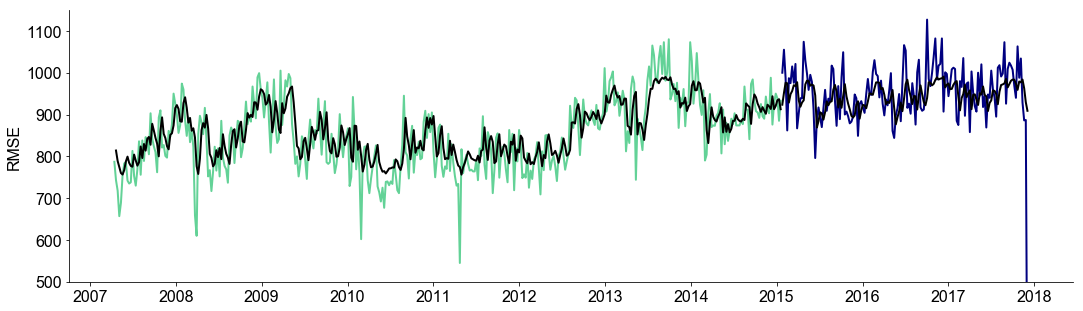

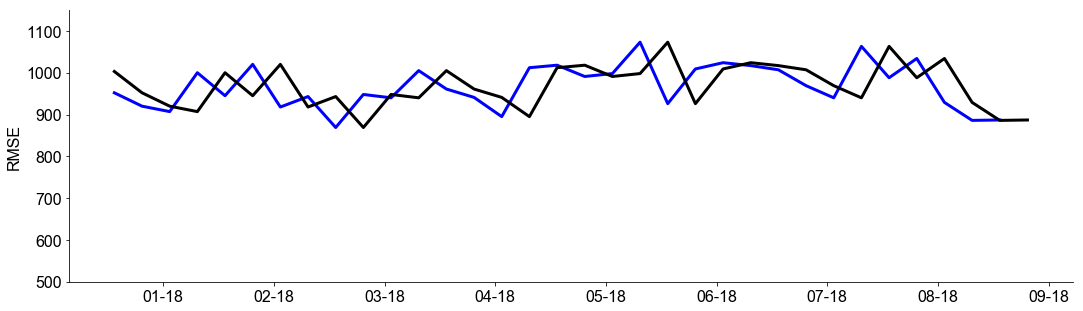

In [429]:
months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
monthsFmt = DateFormatter("%Y")

fig, ax = plt.subplots(figsize=(18,5))
ax.plot_date(dfw.index[-150:],series.values[-150:], '-', color = 'navy', linewidth = 2.0)
# ax.plot_date(dfw.index[-150:],pred_test_avg, '-', color= 'lightgrey', linewidth =1.0)
# ax.plot_date(dfw.index[:-150],pred_train_avg, '-', color = 'lightgrey', linewidth = 1.0)
ax.plot_date(dfw.index[:-150],series.values[:-150], '-', color = '#63d297', linewidth = 2.0)
# ax.plot_date(dfw.index[-150:], predictions_naive, '-', color = 'lightgrey', linewidth = 1.0)
# ax.plot_date(dfw.index[1:-150], predictions_naive_train[1:], '-', color = 'lightgrey', linewidth = 1.0)
# ax.plot_date(dfw.index[-150:], predictions_test_mv, '-', color = 'lightgrey', linewidth = 1.0)
# ax.plot_date(dfw.index[1:-150], predictions_train_mv[1:], '-', color = 'lightgrey', linewidth = 1.0)
ax.plot_date(dfw.index[-150:], predictions_test_lstm, '-', color = 'black', linewidth = 2.0)
ax.plot_date(dfw.index[1:-150], predictions_train_lstm[1:], '-', color = 'black', linewidth = 2.0)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks( **{'fontname':'Arial'})
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })
plt.ylim(500, 1150)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.savefig('avg1g.jpg', bbox_inches = 'tight',format = 'jpeg', dpi=600)
plt.show()

#2018 Only
months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
formatter = DateFormatter('%m-%y')

fig, ax = plt.subplots(figsize=(18,5))
ax.plot_date(dfw.index[-34:-1],series.values[-34:-1], '-', color = 'blue', linewidth = 3.0)
#ax.plot_date(dfw.index[-34:],pred_test_avg[-34:], '-', color= 'grey', linewidth =1.0)
#ax.plot_date(dfw.index[:-150],pred_train_avg[-34:], '-', color = 'lightgrey', linewidth = 1.0)
#ax.plot_date(dfw.index[:-34],series.values[:-34], '-', color = '#63d297', linewidth = 2.0)
ax.plot_date(dfw.index[-34:], predictions_naive[-34:], '-', color = 'black', linewidth = 3.0)
#ax.plot_date(dfw.index[-34:], predictions_naive_train[-34:], '-', color = 'grey', linewidth = 1.0)
#ax.plot_date(dfw.index[-34:], predictions_test_mv[-34:], '-', color = 'grey', linewidth = 1.0)
#ax.plot_date(dfw.index[-31:], predictions_test_lstm[-31:], '-', color = 'black', linewidth = 3.0)
#ax.plot_date(dfw.index[-34:], predictions_train_lstm[-34:], '-', color = 'black', linewidth = 3.0)
# Only show ticks on the left and bottom spines


ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
plt.xticks( **{'fontname':'Arial'})

plt.ylim(500, 1150)
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('avg1h.jpg', bbox_inches = 'tight',format = 'jpeg', dpi=600)
plt.show()


## Barplot

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 432x288 with 0 Axes>

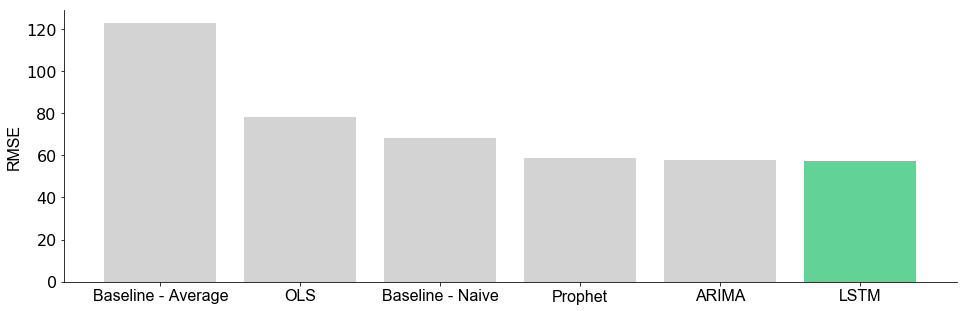

In [155]:
plt.clf()
df = pd.DataFrame(read_csv('rmse_histogram.csv'))
df=df.iloc[:,0:2]
df.dropna(inplace=True, axis=0)
df.columns = ['Method','RMSE']
df.index = df['Method']
df_sorted = df.sort_values('RMSE',ascending=False)
df_sorted = df_sorted[0:6]
#df.iloc[:,0]

plt.figure(figsize=[16,5])

colors = ['lightgray','lightgray','lightgray','lightgray','lightgray','#63d297']
y_pos = np.arange(len(df['Method'])-1)
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })
plt.xticks(y_pos,df_sorted['Method'], rotation = 0, **{'fontname':'Arial'})
plt.bar(y_pos,df_sorted['RMSE'], color = colors, )
#plt.title('RMSE by TimeSeries Method')

ax = plt.subplot(111)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('barplot.jpg', bbox_inches = 'tight',format = 'jpeg', dpi=600)

plt.show()

In [147]:
df

,Method,RMSE
Method,,
ARIMA,ARIMA,57.755
Baseline - Average,Baseline - Average,122.798
Baseline - Naive,Baseline - Naive,68.003
Multivariate LSTM,Multivariate LSTM,56.830
OLS,OLS,78.247
Prophet,Prophet,58.611
LSTM,LSTM,57.172


In [381]:
dfw

,number_crimes
date,
2008-01-13,787
2008-01-20,743
2008-01-27,718
2008-02-03,657
2008-02-10,689
2008-02-17,755
2008-02-24,783
2008-03-02,786
2008-03-09,742


In [392]:
len(predictions_test_lstm)

558